# Computational Linear Algebra: Singular Value Decomposition Homework

In the following homework we decided to explore the topic of *Singular Value Decomposition* used to device a Movie recommendation system like the one used nowdays by many streaming services.

## 1. Dataset Specifications
The dataset we decided to use is the *MovieLens Dataset* which is one of the most widely used datasets for movie recommendation tasks. Such dataset contains user ratings for movies along with metadata like movie genres, titles, and timestamps.

In particular, we considered the "MovieLens 1M Dataset", which contains 1 million ratings from 6000 users on 4000 movies. The dataset is divided into 3 main files:
- "ratings.dat": which contains all the ratings
- "users.dat": which contains all the user information
- "movies.dat": which contains all the movie information

### Ratings dataset
All ratings are contained in the file "ratings.dat" and are in the following format:

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings

### Users dataset
User information is in the file "users.dat" and is in the following format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

### Movies dataset
Movie information is in the file "movies.dat" and is in the following
format:

MovieID::Title::Genres

- Titles are identical to titles provided by the IMDB (including
year of release)
- Genres are pipe-separated and are selected from the following genres:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

- Some MovieIDs do not correspond to a movie due to accidental duplicate
entries and/or test entries
- Movies are mostly entered by hand, so errors and inconsistencies may exist

// TODO: complete the description of the report and explain what are the main steps

## 2. Dataset preparation
### 2.3 Loading the separate datasets
// TODO: add description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load ratings.dat
ratings = pd.read_csv(
    'MovieLens1M/ratings.dat', 
    sep='::', 
    engine='python', 
    names=['UserID', 'MovieID', 'Rating', 'Timestamp'],
    encoding='ISO-8859-1'
)

# Load movies.dat
movies = pd.read_csv(
    'MovieLens1M/movies.dat', 
    sep='::', 
    engine='python', 
    names=['MovieID', 'Title', 'Genres'],
    encoding='ISO-8859-1'
)

# Load users.dat
users = pd.read_csv(
    'MovieLens1M/users.dat', 
    sep='::', 
    engine='python', 
    names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'],
    encoding='ISO-8859-1'
)

# Display the first few rows
print("Ratings:")
print(ratings.head())
print("\nMovies:")
print(movies.head())
print("\nUsers:")
print(users.head())


Ratings:
   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

Movies:
   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy

Users:
   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


### 2.2 Merge DataFrames
We’ll merge the ratings, movies, and users DataFrames to create a single dataset for analysis.

In [2]:
# Merge ratings with movies
ratings_movies = pd.merge(ratings, movies, on='MovieID')

# Merge the result with users
full_data = pd.merge(ratings_movies, users, on='UserID')

# Display the merged dataset
print("Merged Data:")
full_data.head()

Merged Data:


,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067


## 3. Preprocessing
In order to apply the SVD decomposition we need to preprocess the data in the dataset.
### 3.1 Normalize ratings
We normalize the ratings to ensure fair comparison across users.

// TODO: normalize categorical data and encode textual

In [3]:
from sklearn.preprocessing import StandardScaler

# Normalize the ratings
scaler = StandardScaler()
full_data['Normalized_Rating'] = scaler.fit_transform(full_data[['Rating']])

print("Normalized Ratings:")
full_data[['Rating', 'Normalized_Rating']].head()

Normalized Ratings:


,Rating,Normalized_Rating
0,5,1.269747
1,3,-0.520601
2,3,-0.520601
3,4,0.374573
4,5,1.269747


### 3.2 Filter data
To reduce noise in the dataset we filtered out movies or users with very few ratings to reduce noise.

In [4]:
# Filter out movies with less than 10 ratings
movie_counts = full_data['MovieID'].value_counts()
filtered_movies = movie_counts[movie_counts >= 10].index
full_data = full_data[full_data['MovieID'].isin(filtered_movies)]

# Filter out users with less than 10 ratings
user_counts = full_data['UserID'].value_counts()
filtered_users = user_counts[user_counts >= 10].index
full_data = full_data[full_data['UserID'].isin(filtered_users)]

print("Filtered Data:")
full_data.head()

Filtered Data:


,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code,Normalized_Rating
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067,1.269747
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067,-0.520601
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067,-0.520601
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067,0.374573
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067,1.269747


### 4. Data Matrix
In order to apply SVD we transform the dataset into a  user-item matrix where rows are users, columns are movies, and values are ratings.

// TODO: see if we can improve by using other data also

In [5]:
from scipy.sparse.linalg import svds
import numpy as np

# Create user-item matrix
min_val = full_data['Normalized_Rating'].min()
max_val = full_data['Normalized_Rating'].max()
user_item_matrix = full_data.pivot(index='UserID', columns='MovieID', values='Normalized_Rating').fillna(min_val)

# Convert to numpy array
matrix = user_item_matrix.values

# Display the matrix shape
print("User-Item Matrix Shape:", matrix.shape)


User-Item Matrix Shape: (6040, 3260)


In [6]:
def mat_show(mat, K, min_val, max_val):
    # Display the matrix shape
    print(f"Matrix with k = {K}")
    print("User-Item Matrix Shape:", mat.shape)

    plt.figure(figsize=(12, 5))  # Adjust figsize for a wider plot
    plt.imshow(mat, cmap='plasma', interpolation='nearest', vmin=min_val, vmax=max_val)  # Set colormap limits
    plt.colorbar(label='Rating Value')  # Add a colorbar legend with a label
    plt.title(f'User-Movie Matrix (k = {K})')  # Set the title
    plt.yticks(np.arange(0, mat.shape[0], step=1000))  # Customize y-axis ticks
    plt.xlabel('Movies')
    plt.ylabel('Users')
    plt.tight_layout()  # Ensure everything fits nicely
    plt.show()

## 5. Perform SVD
We preform Singular Value Decomposition on the user-item matrix.

In [7]:
def power_method(A, v0, maxIter=1000, relTol=1e-6):

    v0 = v0/np.linalg.norm(v0)
    k = 0
    l0 = 0

    while True:
        v1 = np.dot(A, v0) 
        l1 = np.dot(v1, v0)
        v1 = v1 / np.linalg.norm(v1,2)
        k += 1
        if(k>maxIter or np.abs(l1-l0)<relTol*(np.abs(l0))):
            break
        v0 = v1
        l0 = l1

    return l1, v1

In [8]:
def svd_with_deflation(A, num_singular_values=1, maxIter=100, relTol=1e-6):

    # Step 1: compute A^TA
    ATA = np.dot(A.T, A)

    singular_values = []
    right_singular_vectors = []

    # Step 2: Eigenvalues computation with deflation method
    for _ in range(num_singular_values):
        # Power iteration to find dominant singular value and vector
        singular_value, singular_vector = power_method(ATA, np.random.rand(ATA.shape[1]), maxIter, relTol)

        # Store the singular value and vector
        singular_values.append(np.sqrt(singular_value))
        right_singular_vectors.append(singular_vector)

        # Deflation step
        ATA = ATA - singular_value * np.outer(singular_vector, singular_vector)

    # Step 3: Store the singular values and right singular vectors
    Sigma = np.array(singular_values)
    Vt = np.array(right_singular_vectors)

    # Step 4: Compute the left singular vectors
    U = np.zeros((A.shape[0], num_singular_values))
    for i in range(num_singular_values):
        U[:, i] = A @ Vt[i, :] / Sigma[i]

    return U, np.diag(Sigma), Vt

In [9]:
A = matrix.reshape(-1, matrix.shape[1])
U, sigma, Vt = svd_with_deflation(A, num_singular_values=50, maxIter=1000, relTol=1e-3)
print("U shape:", U.shape)
print("Sigma shape:", sigma.shape)
print("Vt shape:", Vt.shape)

Matrix with k = 1
User-Item Matrix Shape: (6040, 3260)


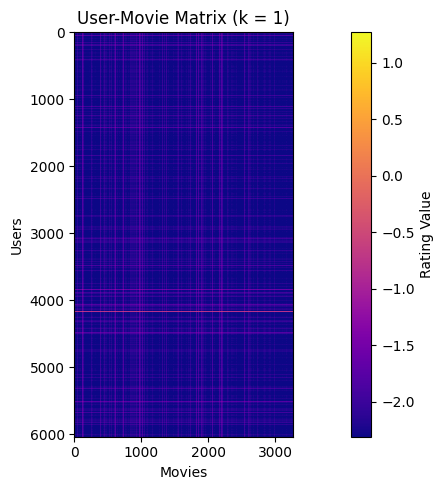

Matrix with k = 5
User-Item Matrix Shape: (6040, 3260)


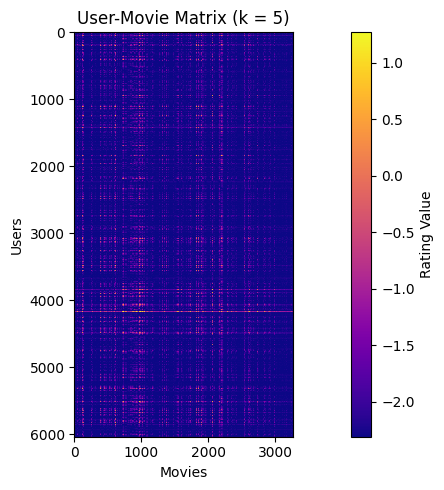

Matrix with k = 10
User-Item Matrix Shape: (6040, 3260)


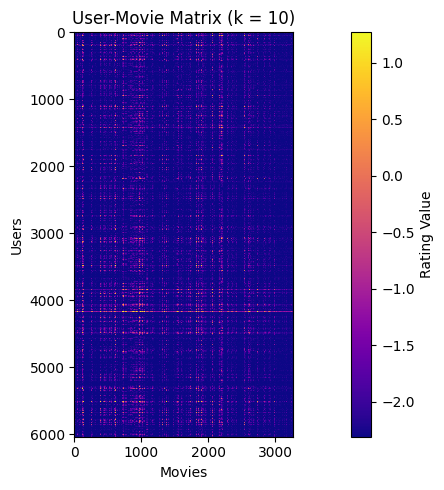

Matrix with k = 50
User-Item Matrix Shape: (6040, 3260)


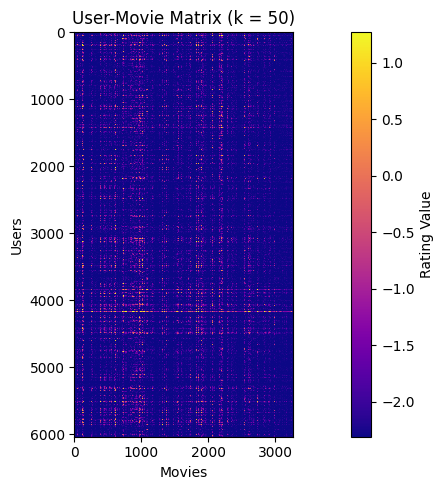

Matrix with k = 100
User-Item Matrix Shape: (6040, 3260)


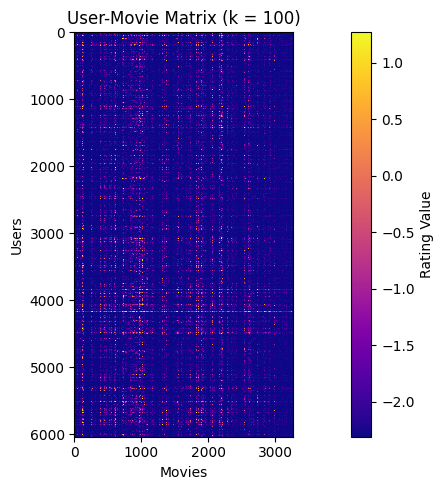

In [11]:
# Display the reconstructed matrix
for k in [1, 5, 10, 50, 100]:
    U, sigma, Vt = svd_with_deflation(matrix, num_singular_values=k, maxIter=1000, relTol=1e-3)
    matrix_hat = np.dot(U, np.dot(sigma, Vt))
    mat_show(matrix_hat, k, min_val, max_val)

In [12]:
U, sigma, Vt = svd_with_deflation(A, num_singular_values=50, maxIter=1000, relTol=1e-3)

In [13]:
# Example SVD computation
U1, sigma1, Vt1 = svds(matrix, k=50)  # k is the number of latent features

# Sort the singular values in descending order
sorted_indices = np.argsort(sigma1)[::-1]  # Indices for sorting in descending order
sigma1 = sigma1[sorted_indices]           # Sort singular values
U1 = U1[:, sorted_indices]                # Reorder columns of U
Vt1 = Vt1[sorted_indices, :]              # Reorder rows of V^T

# Convert sigma to a diagonal matrix
sigma1 = np.diag(sigma1)

# Print shapes for verification
print("U shape:", U1.shape)        # Should be (rows in matrix, k)
print("Sigma shape:", sigma1.shape)  # Should be (k, k)
print("Vt shape:", Vt1.shape)      # Should be (k, columns in matrix)

U shape: (6040, 50)
Sigma shape: (50, 50)
Vt shape: (50, 3260)


From the given decomposition we can reconstruct the original matrix and in doing so predict the missing ratings

In [14]:
# Reconstruct the predicted matrix as A = U * sigma * Vt
predicted_matrix = np.dot(np.dot(U, sigma), Vt)

# Convert back to a DataFrame
predicted_ratings = pd.DataFrame(predicted_matrix, index=user_item_matrix.index, columns=user_item_matrix.columns)

print("Predicted Ratings:")
predicted_ratings.head()

Predicted Ratings:


MovieID,1,2,3,4,5,6,7,8,9,10,...,3942,3943,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.783722,-2.166563,-2.414605,-2.325237,-2.263324,-2.266868,-2.346221,-2.204735,-2.349672,-2.406814,...,-2.311294,-2.312919,-2.301035,-2.317446,-2.372953,-2.007488,-2.214828,-2.267166,-2.267349,-2.223936
2,-2.017399,-2.138380,-2.122183,-2.308507,-2.288483,-1.601728,-2.276914,-2.257014,-2.214337,-1.318496,...,-2.305632,-2.323903,-2.310822,-2.274053,-2.325345,-2.244089,-2.590274,-2.375758,-2.347741,-2.413510
3,-0.988198,-1.987899,-2.262781,-2.317144,-2.327110,-2.350687,-2.438269,-2.257905,-2.283015,-1.825920,...,-2.309496,-2.300237,-2.298677,-2.289256,-2.315488,-2.212533,-2.285946,-2.315219,-2.307514,-2.389061
4,-2.098580,-2.340205,-2.293913,-2.273461,-2.275433,-2.126260,-2.297872,-2.299377,-2.290399,-2.325268,...,-2.321634,-2.298602,-2.321661,-2.308587,-2.358119,-2.223624,-2.247705,-2.328528,-2.292670,-2.319819
5,-1.381842,-2.273461,-2.334710,-2.174591,-2.334248,-1.425277,-2.458586,-2.306291,-2.330144,-2.044384,...,-2.290749,-2.229192,-2.296952,-2.313909,-2.330895,-2.425632,-1.952153,-2.282024,-2.228063,-2.219154


## 6. Recommend Movies
Based on the matrix of predictions we just computed we can recommend top-rated movies based on predicted ratings

In [17]:
def recommend_movies(user_id, predicted_ratings, original_data, num_recommendations=5):
    user_row = predicted_ratings.loc[user_id].sort_values(ascending=False)

    # Exclude movies the user has already rated
    rated_movies = original_data[original_data['UserID'] == user_id]['MovieID']
    recommendations = user_row[~user_row.index.isin(rated_movies)].head(num_recommendations)

    # Map back to movie titles
    recommended_movies = movies[movies['MovieID'].isin(recommendations.index)]
    return recommended_movies

# Recommend movies for a specific user (e.g., user_id = 1)
user_id = 1
recommended_movies = recommend_movies(user_id, predicted_ratings, full_data, num_recommendations=5)

print("Recommended Movies for User {}:".format(user_id))
recommended_movies

Recommended Movies for User 1:


,MovieID,Title,Genres
33,34,Babe (1995),Children's|Comedy|Drama
315,318,"Shawshank Redemption, The (1994)",Drama
360,364,"Lion King, The (1994)",Animation|Children's|Musical
1262,1282,Fantasia (1940),Animation|Children's|Musical
2012,2081,"Little Mermaid, The (1989)",Animation|Children's|Comedy|Musical|Romance


## 7. Evaluation
//TODO: implement some MSE to evaluate our recomendations

In [18]:
# Evaluate the model using RMSE
from sklearn.metrics import mean_squared_error

# Filter out NaN values
predicted_ratings = predicted_ratings.fillna(0)

# Calculate MSE
rmse = np.sqrt(mean_squared_error(matrix, predicted_matrix))
print("RMSE:", rmse)

RMSE: 0.4052217616826643


## 8. Conclusions
// TODO: write conclusions